<div class="alert alert-info" style="margin-top: 20px">
<h1> Projeto de Análise Preditiva Avançada: Prevendo pacientes com Diabetes </h1>


### Sobre o conjunto de dados

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever diagnósticamente se um paciente tem ou não diabetes, com base em certas medições diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade de herança indígena Pima.

### Contexto

Os conjuntos de dados consistem em várias variáveis preditoras médicas e uma variável alvo, Resultado. As variáveis preditoras incluem o número de gravidezes que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.

### Agradecimentos

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**PS.:** _Trecho acima é uma tradução livre da página do dataset na plataforma [kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)._


### Sobre as variáveis do modelo

As variáveis são:  


<table style="width:100%">
  <tr>
    <th style="background-color: #D6EEEE" style="color:Tomato;">Nome da Variável</th>
    <th style="background-color: #D6EEEE" style="color:Tomato;">Tradução</th>
    <th style="background-color: #D6EEEE" style="color:Tomato;">Tipo</th>
    <th style="background-color: #D6EEEE" style="color:Tomato;">Descrição da Variável</th>
  </tr>
  <tr>
    <td>Pregnancies</td>
    <td>Gravides</td>
    <td>Int</td>
    <td>Quantas vezes a paciente esteve grávida</td>
  </tr>
    <tr>
    <td>Glucose</td>
    <td>Glicose</td>
    <td>Int</td>
    <td>Concentração de glicose plasmática de 2 horas em um teste oral de tolerância à glicose</td>
  </tr>
  <tr>
    <td>BloodPressure</td>
    <td>Pressão do sangue</td>
    <td>Int</td>
    <td>Pressão arterial diasstólica (mm Hg)</td>
  </tr>
    <tr>
    <td>SkinThickness</td>
    <td>Espessura da pele</td>
    <td>Int</td>
    <td>Espessura da dobra da pele do tríceps (mm)</td>
  </tr>
  <tr>
    <td>Insulin</td>
    <td>Insulina</td>
    <td>Int</td>
    <td>Insulina sérica de 2 horas (mu U/ml)</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>IMC</td>
    <td>Float</td>
    <td>Índice de massa corporal (peso em kg/(altura em m)^2)</td>
  </tr>
    <tr>
    <td>DiabetesPedigreeFunction</td>
    <td>Função de linhagem de diabetes</td>
    <td>Float</td>
    <td>Diabetes pedigree function</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Idade</td>
    <td>Int</td>
    <td>Idade em Anos do paciente</td>
  </tr>
  <tr>
    <td>Outcome</td>
    <td>Resultado</td>
    <td>Int</td>
    <td>Variável Alvo da Predição: Classe variável (0 ou 1) 268 de 768 são 1, as outras são 0</td>
  </tr>
</table>

</body>
</html>

## Roteiro da Análise

Desenvolva um modelo de predição que classifique se a pessoa possui a doença da diabetes
descrição do dataset - [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database). 
Você deverá criar um notebook seguindo os passos para o desenvolvimento de um modelo de predição.  

**RA1** - Carregar dataset.  
**RA2** - Selecionar e tratar dados de entrada e saída.  
**RA3** - Treinar os modelos (testar diferentes algoritmos, não se limite aos vistos em sala de aula).  
**RA4** - Avaliar os modelos.  
**RA5** - Definir o modelo mais robusto.  
**RA6** - Uma vez definido o modelo mais robusto.  
    •	Criar um Pipeline que automatize todo processo de tratamento de dados e treinamento dos modelos.  
    •	Salve o seu modelo para que ele possa ser utilizado em ambiente de produção.  
OBS: Você deverá entregar apenas o notebook desenvolvido. Importante que você justifique os passos realizados.  


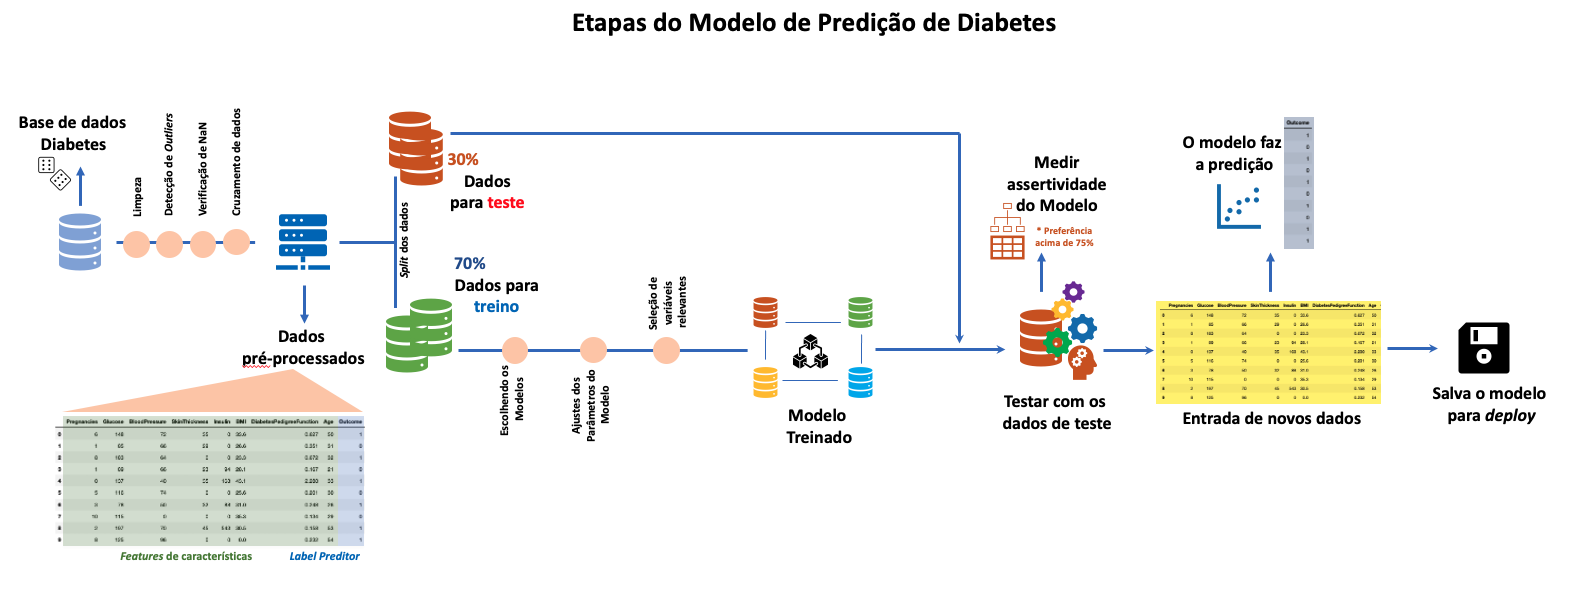

### **RA1. Carregando o Dataset**

In [1]:
# IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS DO MODELO
# Pandas (Painel Data) é uma biblioteca para manipulação de dados e leitura de
# arquivo, muito útil para ciência de dados.
import pandas as pd

# Bibliotecas para trabalhar com calculos e matrizes
import numpy as np

# Bibliotecas para vizualização de dados
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Realizando a leitura dos dados para a análise
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Verificando se o banco de dados possui NaN (Not a Number) e os tipos de  
# variáveis que estamos trabalhando. se necessário alguma modificação.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Análise Exploratória de Dados - Tratamento de _Outliers_

### Montando a matriz de correlação das variáveis numéricas

O objetivo dessa análise é encontrar variáveis altamente correlacionadas a fim de que possa prejudicar na preparação dos cluster.  

**Correlação (0,9 a 1,0):** positiva ou negativa é considerada muito forte;  
**Correlação (0,7 a 0,9):** positiva ou negativa é considerada correlação forte;  
**Correlação (0,5 a 0,7):** positiva ou negativa é considerada correlação moderada;  
**Correlação (0,3 a 0,4):** positiva ou negativa é considerada correlação fraca;  
**Correlação (0,0 a 0,3):** positiva ou negativa não possui correlação;  

Text(0.5, 1.0, 'Correlação das Features do dataset de Diabetes')

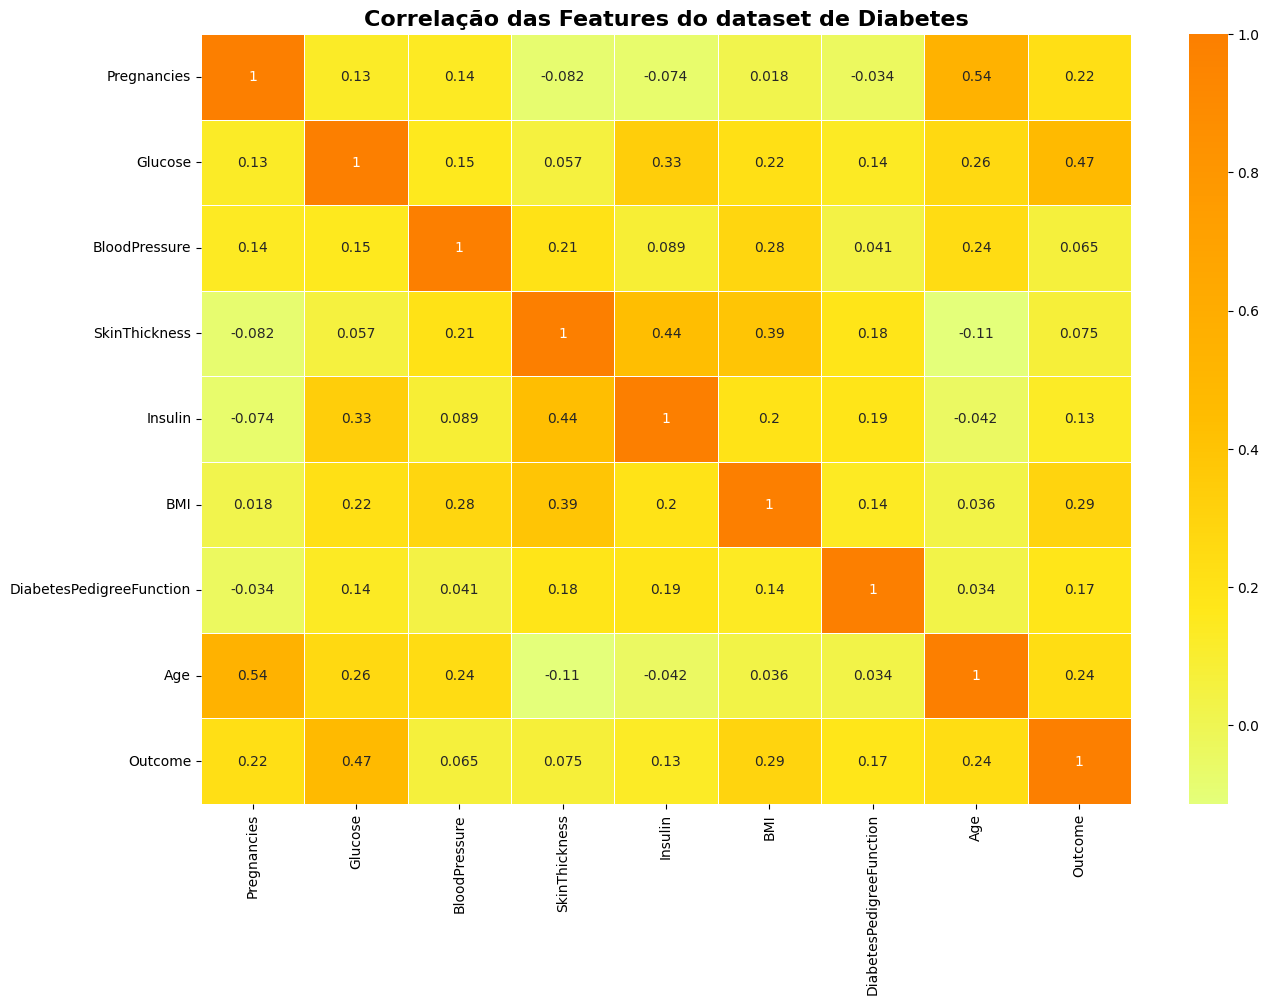

In [4]:
# Verificando a correlação entre as variáveis que possivelmente possa afetar algum dos modelos 
# que iremos utilizar no projeto.
# Aqui, percebemos que as variaveis não estão altamente correlacionadas. Para um modelo de cluster 
# é possivel utilizar todas as variáveis disponíveis.

plt.figure(figsize=(15,10)) # Definindo o tamanho da vizualização do gráfico
sns.heatmap(dataset.corr(), # Correlação do dataset
            annot=True,     # Escreve o resultado dos dados dentro da célula
            cmap='Wistia',  # Controlado as cores do gráfico
            linewidth=.5);  # Linha separando os quadrados das variáveis
plt.title('Correlação das Features do dataset de Diabetes', size=16, fontweight = 'bold')


#### Procurando outliers no Dataset

In [5]:
round(dataset.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [5]:
# Definindo uma função para ajudar a encontrar possíveis outliers nos dados.
# Analisando por meio dos quartis ========================================================
def limites(variavel):
    Q1 = variavel.quantile(.25)
    Q3 = variavel.quantile(.75)
    amplitude = Q3 - Q1
    return Q1 - 1.5 * amplitude, Q3 + amplitude

# Parametrizando os gráficos para melhor a vizualização =================================
def limites_boxplot(variavel):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Vizualizando Outliers", 
               fontsize = 'x-large' ,  
               fontweight = 'bold' ) 
    fig.set_size_inches(15,5)
    sns.boxplot(x=variavel, ax=ax1).set_title('Dados puros')
    
    ax2.set_xlim(limites(variavel))
    sns.boxplot(x=variavel, ax=ax2).set_title('Dados sem Outliers')
    
# Função de grafico de barras para verificar a distribuição =============================
def grafico_barra(variavel):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x = variavel.value_counts().index,
                     y = variavel.value_counts(),
                     color='Green')    
    # ax.set_xlim(limites(variavel))

# Função de histograma para verificar a distribuição=====================================
def histograma(variavel):
    plt.figure(figsize=(15, 5))
    sns.distplot(variavel, hist=True)
    
# Caso iremos remover outliers utilizaremos a função abaixo =============================
def remover_outliers(df, nome_variavel):
    Qtd_linhas = df.shape[0]
    Lim_inf, Lim_sup = limites(df[nome_variavel])
    df = df.loc[(df[nome_variavel] >= Lim_inf) & (df[nome_variavel]<= Lim_sup), : ]
    linhas_removidas = Qtd_linhas - df.shape[0]
    return df, linhas_removidas

# Exemplo Código para remoção ===========================================================
# dataset, linhas_removidas = remover_outliers(dataset, 'Pregnancies')
# print(f'{linhas_removidas} linhas removidas')    

#### Pregnancies

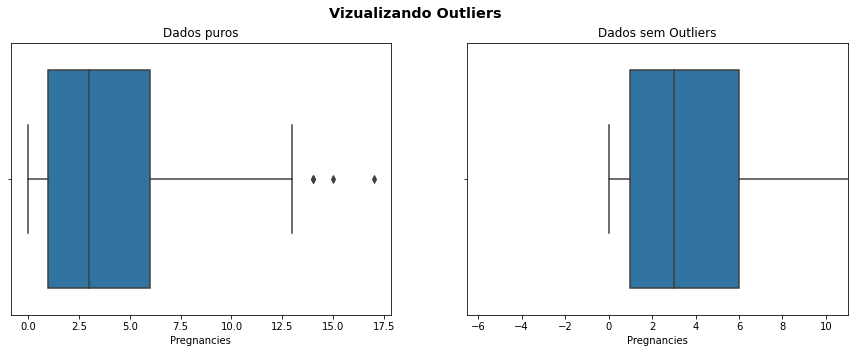

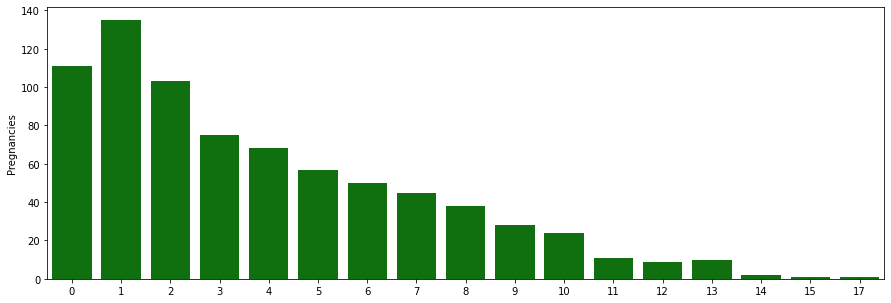

In [7]:
limites_boxplot(dataset['Pregnancies'])
grafico_barra(dataset['Pregnancies'])

#### Glucose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


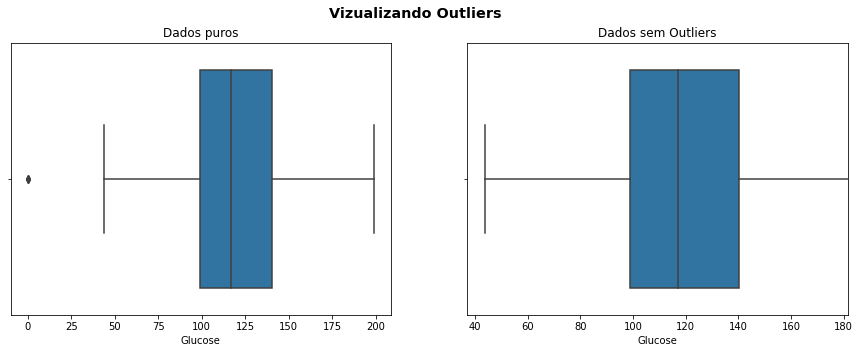

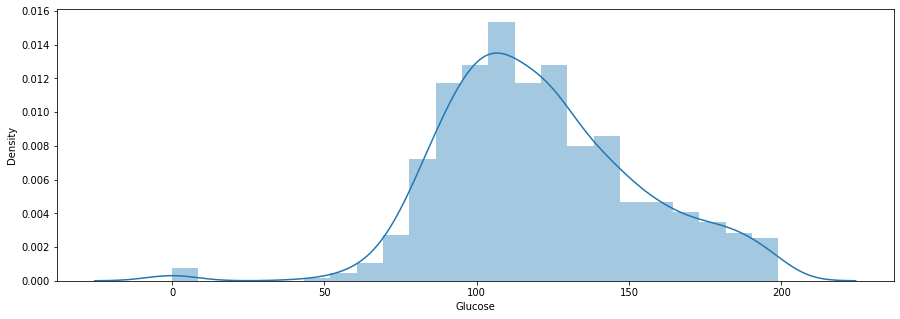

In [8]:
limites_boxplot(dataset['Glucose'])
histograma(dataset['Glucose'])

#### BloodPressure

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


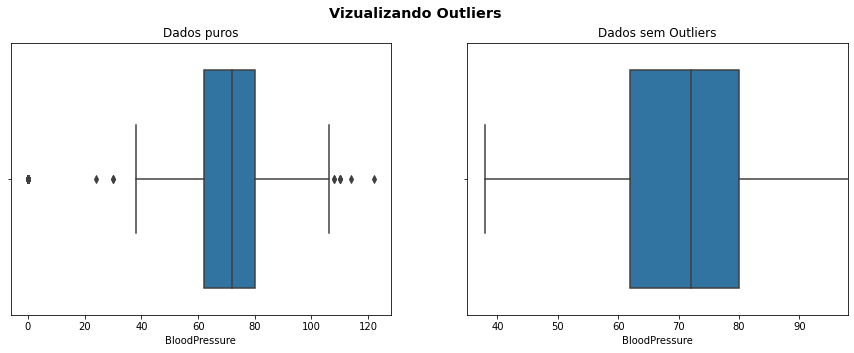

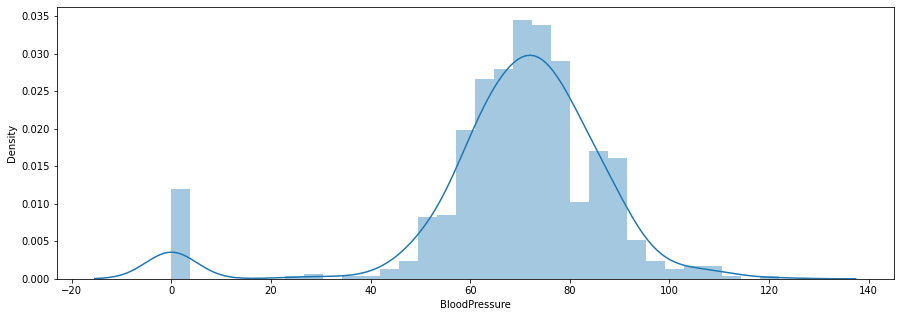

In [9]:
limites_boxplot(dataset['BloodPressure'])
histograma(dataset['BloodPressure'])

#### SkinThickness

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


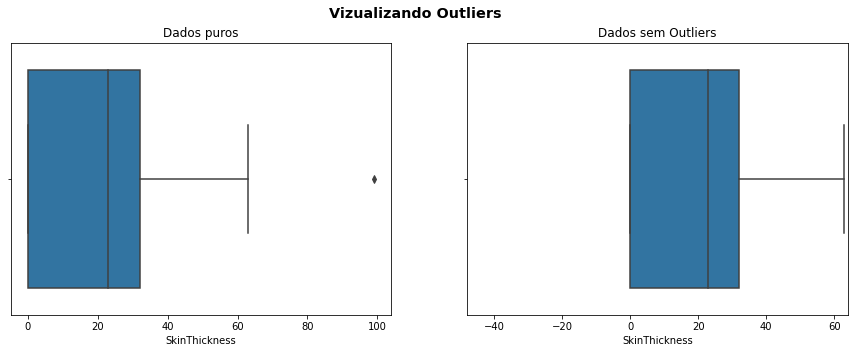

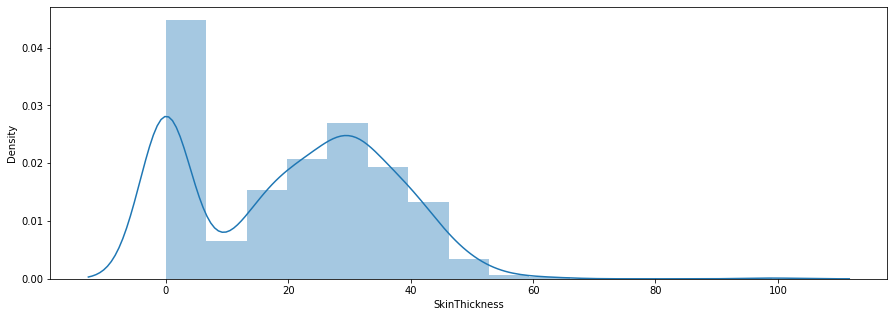

In [10]:
limites_boxplot(dataset['SkinThickness'])
histograma(dataset['SkinThickness'])

####  Insulin  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


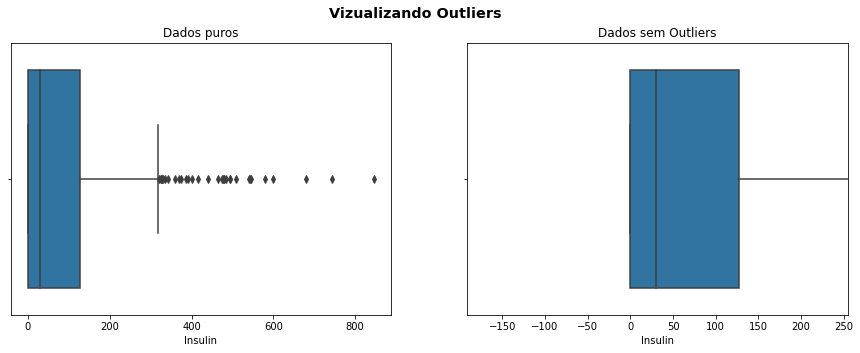

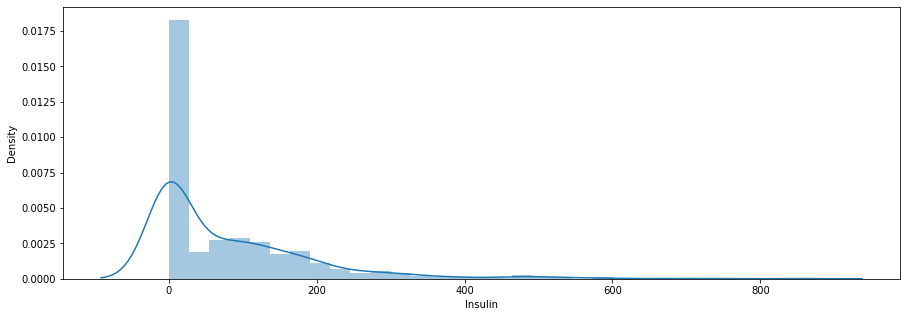

In [11]:
limites_boxplot(dataset['Insulin'])
histograma(dataset['Insulin'])

#### BMI


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


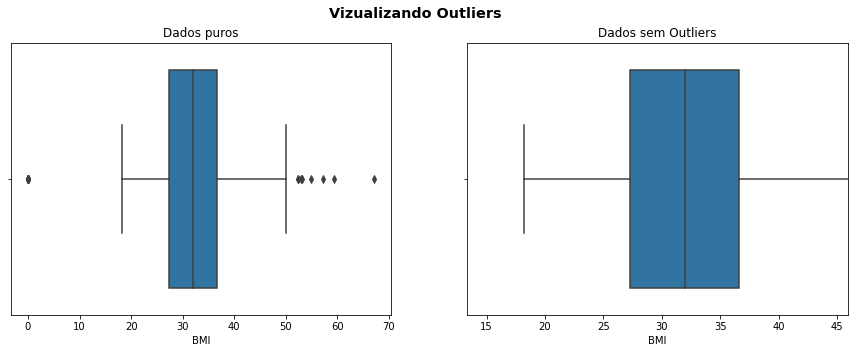

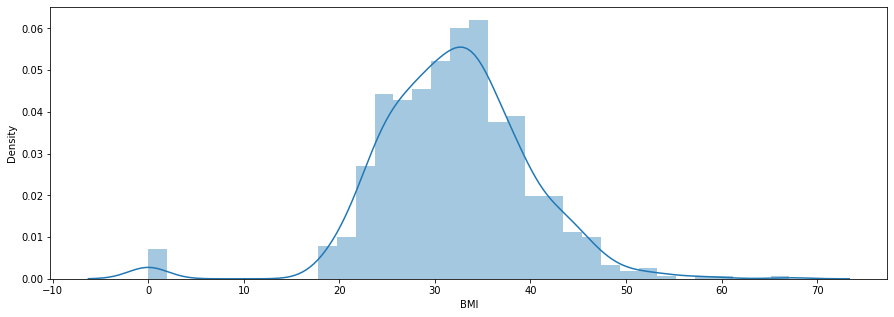

In [12]:
limites_boxplot(dataset['BMI'])
histograma(dataset['BMI'])

#### DiabetesPedigreeFunction


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


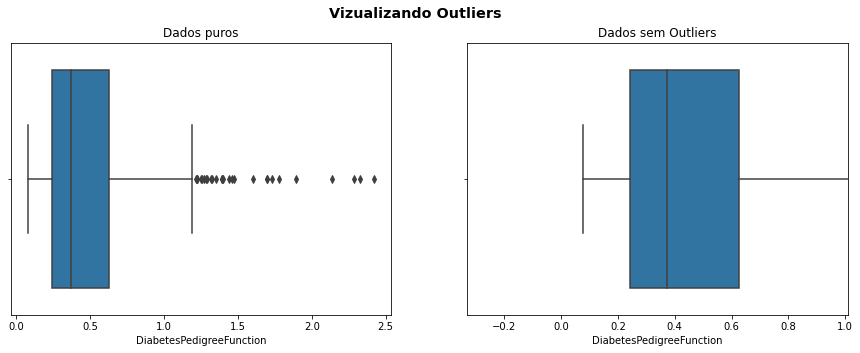

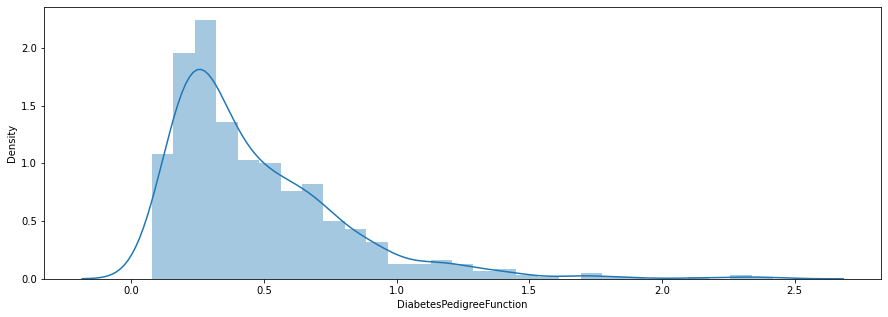

In [13]:
limites_boxplot(dataset['DiabetesPedigreeFunction'])
histograma(dataset['DiabetesPedigreeFunction'])

 #### Age


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


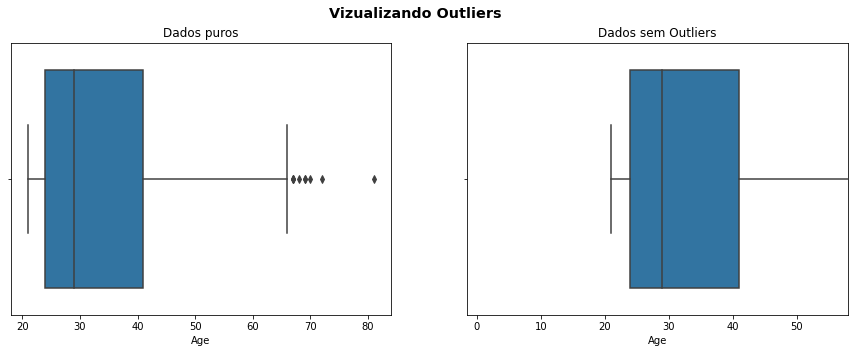

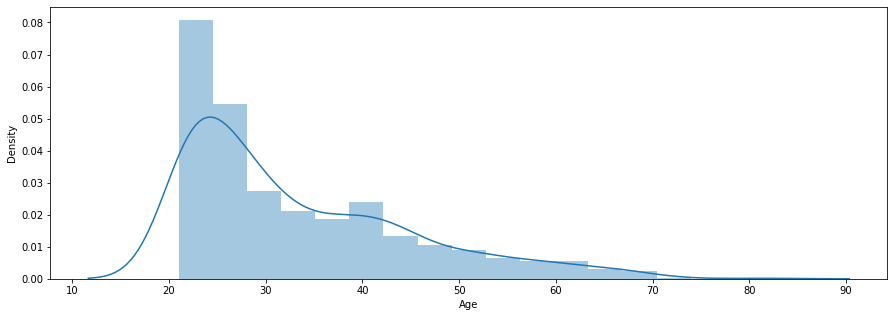

In [14]:
limites_boxplot(dataset['Age'])
histograma(dataset['Age'])

#### Outcome

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


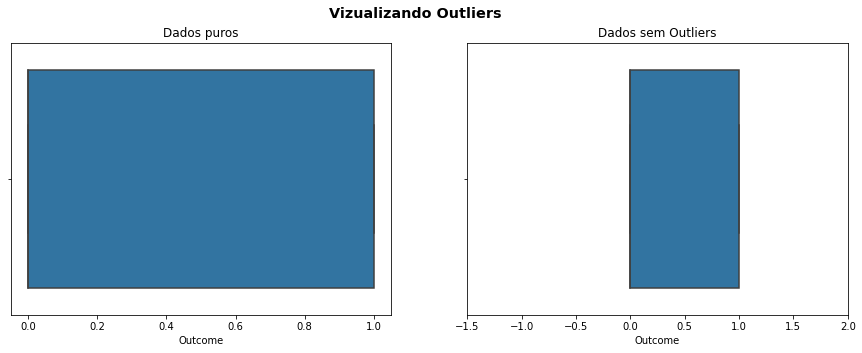

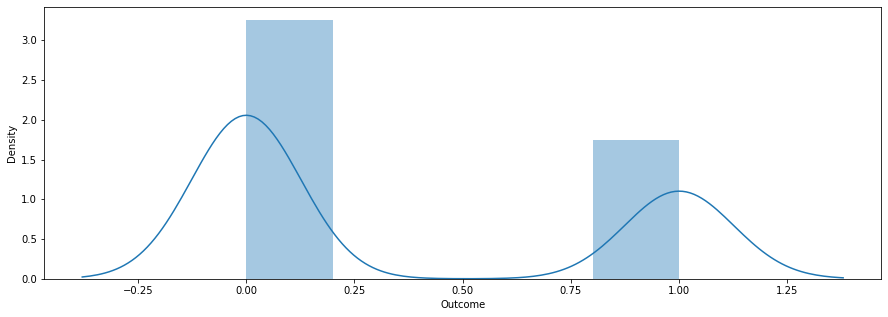

In [15]:
limites_boxplot(dataset['Outcome'])
histograma(dataset['Outcome'])

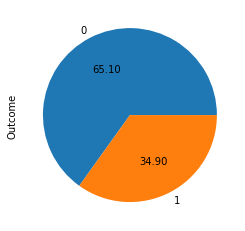

In [16]:
# Visualizando a proporção dessa base
dataset['Outcome'].value_counts().plot.pie(autopct='%.2f');

Avaliando a variável target, percebe-se que a mesma está desbalanceada.

### Preparação para o modelo de Cluster

In [17]:
print("Média dos valores do dataset \n",
    round(dataset.mean(),2),
    '\n','-'*40,'\n',
    "Desvio Padrão dos valores do dataset \n",
    round(dataset.std(),2)
)

Média dos valores do dataset 
 Pregnancies                   3.85
Glucose                     120.89
BloodPressure                69.11
SkinThickness                20.54
Insulin                      79.80
BMI                          31.99
DiabetesPedigreeFunction      0.47
Age                          33.24
Outcome                       0.35
dtype: float64 
 ---------------------------------------- 
 Desvio Padrão dos valores do dataset 
 Pregnancies                   3.37
Glucose                      31.97
BloodPressure                19.36
SkinThickness                15.95
Insulin                     115.24
BMI                           7.88
DiabetesPedigreeFunction      0.33
Age                          11.76
Outcome                       0.48
dtype: float64


In [18]:
# Salvando as variáveis numericas em um novo dataset sem a variável target
# O intuito é que no final possamos comparar o resultado do modelo com os dados reais
# dataset_num = dataset.drop(columns={'Outcome'})
# dataset_num.columns

In [19]:
# Após a remoção da variável alvo, o modelo continua com correlações baixas entre as variáveis.
# round( dataset_num.corr(), 2)

In [6]:
# Iremos gerar a padronizzção dos dados para preparar a base de dados
dataset_num_padr = ( (dataset[dataset.columns] - 
                    dataset[dataset.columns].mean() 
                    ) / dataset.std() )

dataset_num_padr.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006
5,0.342757,-0.153085,0.252871,-1.287373,-0.692439,-0.810813,-0.817546,-0.275580,-0.731643
6,-0.250789,-1.341602,-0.987066,0.718617,0.071158,-0.125895,-0.675693,-0.615709,1.365006
7,1.826623,-0.184362,-3.570271,-1.287373,-0.692439,0.419502,-1.019762,-0.360612,-0.731643
8,-0.547562,2.380333,0.046215,1.533551,4.019303,-0.189314,-0.947326,1.680164,1.365006
9,1.233077,0.128406,1.389481,-1.287373,-0.692439,-4.057829,-0.723983,1.765196,1.365006


#### Bibliotecas para os modelos de predição

In [7]:
# Biblioteca para padronizar e normalizar os dados os dados. A literatura
# indica que o ideal para padronizar é quando os dados não seguem uma forma
# de distribuição Normal N~(0,desvio) e normalizar quando a distribuição 
# for normal.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Biblioteca para realizar a separação dos dados em Treino e teste 
# para os modelos que serão utilizados.
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Bibliotecas referente aos modelos utilizados na análise
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm


# Parametros de validação dos modelos
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

#### Preparação dos dados para os modelos

In [8]:
# Separação dos dados em X (variáveis de suporte ao modelo) e y (variável preditora)
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']
# y = y[:,np.newaxis] # Transformando os dados em array para rodar normalmente a padronização

In [9]:
# Vizualizando a separação das variáveis de X
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
# Vizualizando a variável y
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
# Separando os dados do modelo em treino e teste
# Defindo que 30% do nosso dataset será destinado para teste do modelo
# random_state, definição da forma randomica de seleção dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=4,
                                                    test_size=.30)

In [13]:
print(f"Base de Treino (X): {X_train.shape}\nBase de Treino (y): {y_train.shape}")
print(f"Base de Teste (X): {X_test.shape}\nBase de Teste (y): {y_test.shape}")

Base de Treino (X): (537, 8)
Base de Treino (y): (537,)
Base de Teste (X): (231, 8)
Base de Teste (y): (231,)


In [27]:
# Realizando a paronização dos dados
# dados_padro_dados = StandardScaler().fit(X_train)
# target_padro_dados = StandardScaler().fit(y_train)

In [28]:
# Aplicando a padronização dos dados
# X_train = dados_padro_dados.transform(X_train)
# y_train = target_padro_dados.transform(y_train)

# X_test = dados_padro_dados.transform(X_test)
# y_test = target_padro_dados.transform(y_test)

Serão utilizados no projetos, os seguintes modelos:
 - Regressão Logistica;
 - Random Forest Classifier;
 - Decision Tree;
 - Support Vector Machines;
 - Stochastic Gradient Descendent Classifier.

### Métricas de Classificação e Avaliação

As métricas de avaliação dos modelos serão:


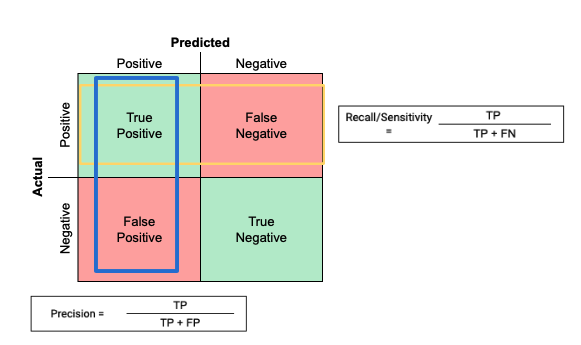
Fonte: [Confusion Matrix with Recall and Precision formulas](https://medium.com/@data.science.enthusiast/positive-class-in-machine-learning-how-to-define-classes-in-imbalanced-dataset-2940fd243a7e)

**1. Acurácia** Exatidão (ACC) mede a fração de previsões corretas. O intervalo é de 0 a 1. Um valor maior indica melhor precisão preditiva.  

$$ Accuracy = \frac{TP + TN}{TP + FN + FP + TN} $$  

**2. Precisão**  é uma métrica que descreve a precisão preditiva geral do modelo ML em todas as classes. Um valor maior indica melhor precisão preditiva.  

$$ Precision = \frac{TP}{TP + FP} $$

**3. Recall** é a relação entre o número de amostras positivas corretamente classificadas como positivas e o número total de amostras positivas reais. Quanto maior o recall, mais amostras positivas reais foram encontradas.  

$$Recall = \frac{TP}{TP + FN}$$ 

**4. F1Score**  A pontuação F1 é uma métrica de classificação binária que considera tanto a precisão das métricas binárias como sua recuperação. Ela é a média harmônica entre precisão e recuperação. O intervalo é de 0 a 1. Um valor maior indica melhor precisão preditiva:  

$$ F1Score = \frac{2*Precision * Recall}{Precision + Recall}$$

  - Fonte: [ML model evaluation metrics (Accuracy, Precision, Recall, Specificity, F1 Score and Negative Predictive Value) for a fintech case](https://medium.com/@data.science.enthusiast/main-evaluation-metrics-for-a-fintech-case-9f3f9d103173)  
  - Fonte: [Amazon Machine Learning Guia do desenvolvedor](https://docs.aws.amazon.com/pt_br/machine-learning/latest/dg/machinelearning-dg.pdf#evaluating-model-accuracy)

### Parâmetros dos Modelos

A ordem de escolha do melhor modelo será utilizada a sequência dos parâmetros acima, **<font color='blue'>Acurácia, Precisão, Recall</font>** e por fim **<font color='blue'>F1Score</font>** para a **<font color='red'>Classe 01 de diabetes</font>**, que é a classe que queremos prever.

In [29]:
# Criando uma função para rodar todos os modelos e os parametros de melhorias caso
# sejam necessário. Caso não determine os parametros o modelo rodará default.
modelo_lr = LogisticRegression(random_state=0, max_iter=500).fit(X_train, y_train)
modelo_rfc = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
modelo_dt = tree.DecisionTreeClassifier(max_leaf_nodes=4, random_state=0).fit(X_train, y_train)
modelo_svm = svm.SVC(kernel='rbf').fit(X_train, y_train)
modelo_sgdc = SGDClassifier(alpha=0.1, # taxa de regularização
                              learning_rate='constant', 
                              eta0=0.005, # taxa de aprendizagem
                              loss='log', 
                              max_iter=1000,
                              random_state=4, 
                              verbose=True,
                              early_stopping=True, 
                              validation_fraction=0.15).fit(X_train, y_train)
modelo_knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
modelo_et = ExtraTreesClassifier()
modelo_gbc = GradientBoostingClassifier(n_estimators=1200,
                                     learning_rate=.01,
                                     max_depth=1, 
                                     random_state=0).fit(X_train, y_train)

# Gerando um dicionário para rodar varios modelos na sequência
modelos = {
    'LogisticRegression': modelo_lr,
    'RandomForestClassifier': modelo_rfc,
    'tree.DecisionTreeClassifier':modelo_dt,
    'svm.SVC': modelo_svm,
    'SGDClassifier': modelo_sgdc,
    'KNeighborsClassifier': modelo_knn,
    'ExtraTreeClassifier': modelo_et,
    'GradientBoostingClassifier': modelo_gbc
}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


-- Epoch 1
Norm: 2.03, NNZs: 8, Bias: -0.113452, T: 456, Avg. loss: 45.848975
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.89, NNZs: 8, Bias: -0.186949, T: 912, Avg. loss: 35.903929
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.88, NNZs: 8, Bias: -0.282062, T: 1368, Avg. loss: 44.861923
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.64, NNZs: 8, Bias: -0.361989, T: 1824, Avg. loss: 45.631565
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.71, NNZs: 8, Bias: -0.451216, T: 2280, Avg. loss: 47.512316
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.86, NNZs: 8, Bias: -0.550163, T: 2736, Avg. loss: 39.993050
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.40, NNZs: 8, Bias: -0.655784, T: 3192, Avg. loss: 46.735385
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.97, NNZs: 8, Bias: -0.756096, T: 3648, Avg. loss: 45.385828
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 3.26, NNZs: 8, Bias: -0.852643, T: 4104, Avg. loss: 40.404649
Total train

In [14]:
# Criando uma função para rodar todos os modelos e os parametros de melhorias caso
# sejam necessário. Caso não determine os parametros o modelo rodará default.
modelo_lr = LogisticRegression(random_state=0, max_iter=500)
modelo_rfc = RandomForestClassifier(max_depth=2, random_state=0)
modelo_dt = tree.DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
modelo_svm = svm.SVC(kernel='rbf')
modelo_sgdc = SGDClassifier(alpha=0.1, # taxa de regularização
                              learning_rate='constant', 
                              eta0=0.005, # taxa de aprendizagem
                              loss='log', 
                              max_iter=1000,
                              random_state=4, 
                              verbose=True,
                              early_stopping=True, 
                              validation_fraction=0.15)
modelo_knn = KNeighborsClassifier(n_neighbors=2)
modelo_et = ExtraTreesClassifier()
modelo_gbc = GradientBoostingClassifier(n_estimators=1200,
                                     learning_rate=.01,
                                     max_depth=1, 
                                     random_state=0)

# Gerando um dicionário para rodar varios modelos na sequência
modelos = {
    'LogisticRegression': modelo_lr,
    'RandomForestClassifier': modelo_rfc,
    'tree.DecisionTreeClassifier':modelo_dt,
    'svm.SVC': modelo_svm,
    'SGDClassifier': modelo_sgdc,
    'KNeighborsClassifier': modelo_knn,
    'ExtraTreeClassifier': modelo_et,
    'GradientBoostingClassifier': modelo_gbc
}


In [15]:
# Criando uma função para executar em sequência os modelos, juntamente com 
def avaliar_modelo(nome_modelo, y_test, previsao):
    target_names = ['Sem Diabete', 'Com Diabete']
    return print(f'Resultado do Modelo {nome_modelo} \n' + classification_report(y_test, 
                                                                                 previsao, 
                                                                                 target_names=target_names))

In [16]:
# Parte de código destinada para testar os modelos imprimindo os resultados
# O nome do modelo é como ele aparece na biblioteca, e o modelo é como 
# ele é executado também na boblioteca para que não dê erro no momento
# da execução dos modelos.
# PARA O MODELO SER VIÁVEL A MEDIDA DE ACERTIVIDADE DELE DEVE SER SUPERIOR A 75%
# 
for nome_modelo, modelo in modelos.items():
    # Treinar 
    modelo.fit(X_train, y_train)
    # Testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Resultado do Modelo LogisticRegression 
              precision    recall  f1-score   support

 Sem Diabete       0.83      0.89      0.86       152
 Com Diabete       0.75      0.66      0.70        79

    accuracy                           0.81       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.81      0.81      0.81       231

None
Resultado do Modelo RandomForestClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.75      0.95      0.84       152
 Com Diabete       0.82      0.39      0.53        79

    accuracy                           0.76       231
   macro avg       0.78      0.67      0.69       231
weighted avg       0.77      0.76      0.73       231

None
Resultado do Modelo tree.DecisionTreeClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.83      0.88      0.85       152
 Com Diabete       0.73      0.65      0.68        79

    accuracy                           

Pela análise preliminar o modelo com melhor acurácia foi o **<font color='green'>Support Vector Machines</font>** com acurácia de 82% Precision de 83% para prever a Classe 1.

---
## Vizualizando cada modelo com mais detalhes

<div class="alert alert-danger" style="margin-top: 20px">
<h1> Modelo de Regressão Logística </h1>

In [17]:
modelo_lr = LogisticRegression(random_state=0, max_iter=500).fit(X_train, y_train)

In [18]:
y_previsao = modelo_lr.predict(X_test)
y_previsao

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

### Avaliação do Modelo

In [19]:
# Avaliando a acurácia do modelo
# accuracy_score(y_test,y_pred)
print(f"Accuracy of logistic regression classifier on train set: {modelo_lr.score(X_train, y_train):.2%}") 
print(f'Accuracy of logistic regression classifier on test set: {modelo_lr.score(X_test, y_test):.2%}')
print(f'Recall of logistic regression classifier on test set: {recall_score(y_test,y_previsao):.2%}')
print(f'ROC/AUC of logistic regression classifier on test set: {roc_auc_score(y_test, modelo_lr.predict_proba(X_test)[:,1]):.2%}')

Accuracy of logistic regression classifier on train set: 75.98%
Accuracy of logistic regression classifier on test set: 80.95%
Recall of logistic regression classifier on test set: 65.82%
ROC/AUC of logistic regression classifier on test set: 85.53%


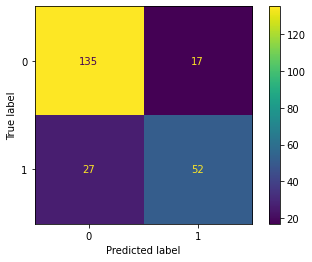

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo_lr, X_test, y_test);

In [21]:
ACC = (135+52) / (135+17+27+52)
REC = 135 / (135+17)
PREC = 135 / (135 + 27)
F1S = (2*PREC*REC)/(PREC+REC)
print(f'Acuracia de {ACC:.2f}\nPrecisão de {PREC:.2f}\nRecall de {REC:.2f}\nF1Score de {F1S:.2f}')

Acuracia de 0.81
Precisão de 0.83
Recall de 0.89
F1Score de 0.86


In [22]:
from sklearn.metrics import classification_report
target_names = ['Sem Diabete', 'Com Diabete']
print ('Resultado do Modelo Regressão Logística \n' + classification_report(y_test, y_previsao, target_names=target_names))

Resultado do Modelo Regressão Logística 
              precision    recall  f1-score   support

 Sem Diabete       0.83      0.89      0.86       152
 Com Diabete       0.75      0.66      0.70        79

    accuracy                           0.81       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.81      0.81      0.81       231



**Fonte**: [scikit-learn.org - Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression)

<div class="alert alert-danger" style="margin-top: 20px">
<h1> Modelo Random Forest Classifier </h1>

In [23]:
modelo_rfc = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_previsao_rfc = modelo_rfc.predict(X_test)
y_previsao_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

### Avaliação do Modelo RandomForestClassifier

In [24]:
# Avaliando a acurácia do modelo
# accuracy_score(y_test,y_pred)
print(f"Accuracy of logistic regression classifier on train set: {modelo_rfc.score(X_train, y_train):.2%}") 
print(f'Accuracy of logistic regression classifier on test set: {modelo_rfc.score(X_test, y_test):.2%}')
print(f'Recall of logistic regression classifier on test set: {recall_score(y_test,y_previsao):.2%}')
print(f'ROC/AUC of logistic regression classifier on test set: {roc_auc_score(y_test, modelo_rfc.predict_proba(X_test)[:,1]):.2%}')

Accuracy of logistic regression classifier on train set: 73.74%
Accuracy of logistic regression classifier on test set: 76.19%
Recall of logistic regression classifier on test set: 65.82%
ROC/AUC of logistic regression classifier on test set: 84.62%


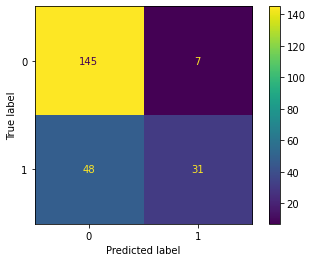

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo_rfc, X_test, y_test);

In [26]:
print('Resultado do Modelo Randon Forest Classifier \n' + classification_report(y_test, 
                                                                                y_previsao_rfc, 
                                                                                target_names=target_names))

Resultado do Modelo Randon Forest Classifier 
              precision    recall  f1-score   support

 Sem Diabete       0.75      0.95      0.84       152
 Com Diabete       0.82      0.39      0.53        79

    accuracy                           0.76       231
   macro avg       0.78      0.67      0.69       231
weighted avg       0.77      0.76      0.73       231



<div class="alert alert-danger" style="margin-top: 20px">
<h1> Modelo Decision Tree </h1>

In [27]:
modelo_dt = tree.DecisionTreeClassifier(max_leaf_nodes=4, random_state=0).fit(X_train, y_train)
y_previsao_dt = modelo_dt.predict(X_test)
y_previsao_dt

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

### Avaliação do Modelo Decision Tree

In [28]:
# Avaliando a acurácia do modelo
# accuracy_score(y_test,y_pred)
print(f"Accuracy of logistic regression classifier on train set: {modelo_dt.score(X_train, y_train):.2%}") 
print(f'Accuracy of logistic regression classifier on test set: {modelo_dt.score(X_test, y_test):.2%}')
print(f'Recall of logistic regression classifier on test set: {recall_score(y_test, y_previsao_dt):.2%}')
print(f'ROC/AUC of logistic regression classifier on test set: {roc_auc_score(y_test, modelo_dt.predict_proba(X_test)[:,1]):.2%}')

Accuracy of logistic regression classifier on train set: 76.16%
Accuracy of logistic regression classifier on test set: 79.65%
Recall of logistic regression classifier on test set: 64.56%
ROC/AUC of logistic regression classifier on test set: 78.88%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


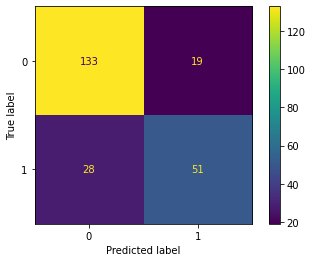

In [44]:
plot_confusion_matrix(modelo_dt, X_test, y_test);

In [45]:
print('Resultado do Modelo Decision Tree \n' + classification_report(y_test, 
                                                                     y_previsao_dt, 
                                                                     target_names=target_names))

Resultado do Modelo Decision Tree 
              precision    recall  f1-score   support

 Sem Diabete       0.83      0.88      0.85       152
 Com Diabete       0.73      0.65      0.68        79

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



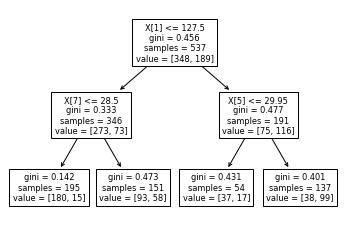

In [46]:
tree.plot_tree(modelo_dt)
plt.show();

Fonte: [sklearn.org - Decision Tree](https://scikit-learn.org/stable/modules/tree.html#tree)

<div class="alert alert-danger" style="margin-top: 20px">
<h1> Modelo Support Vector Machines </h1>

In [47]:
modelo_svm = svm.SVC().fit(X_train, y_train)
y_predicao_svm = modelo_svm.predict(X_test)
y_predicao_svm

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

### Avaliação do Modelo Support Vector Machines

In [48]:
# Avaliando a acurácia do modelo
# accuracy_score(y_test,y_pred)
print(f"Accuracy Support Vector Machines on train set: {modelo_svm.score(X_train, y_train):.2%}") 
print(f'Accuracy Support Vector Machines on test set: {modelo_svm.score(X_test, y_test):.2%}')
print(f'Recall Support Vector Machines on test set: {recall_score(y_test, y_predicao_svm):.2%}')
# print(f'ROC/AUC Support Vector Machines on test set: {roc_auc_score(y_test, modelo_svm.predict(X_test)[:,1]):.2%}')

Accuracy Support Vector Machines on train set: 74.86%
Accuracy Support Vector Machines on test set: 82.25%
Recall Support Vector Machines on test set: 60.76%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


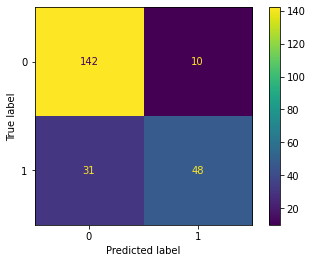

In [49]:
plot_confusion_matrix(modelo_svm, X_test, y_test);

In [50]:
print('Resultado do Modelo Support Vector Machines \n' + classification_report(y_test, 
                                                                               y_predicao_svm, 
                                                                               target_names=target_names))

Resultado do Modelo Support Vector Machines 
              precision    recall  f1-score   support

 Sem Diabete       0.82      0.93      0.87       152
 Com Diabete       0.83      0.61      0.70        79

    accuracy                           0.82       231
   macro avg       0.82      0.77      0.79       231
weighted avg       0.82      0.82      0.81       231



Fonte: [Sklearn.org - Modelo Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#svm)

<div class="alert alert-danger" style="margin-top: 20px">
<h1> Modelo SGDClassifier </h1>

In [51]:
modelo_sgdc = SGDClassifier(alpha=0.1, # taxa de regularização
                              learning_rate='constant', 
                              eta0=0.005, # taxa de aprendizagem
                              loss='log', 
                              max_iter=1000,
                              random_state=4, 
                              verbose=True,
                              early_stopping=True, 
                              validation_fraction=0.15).fit(X_train, y_train)
y_previsao_sgdc = modelo_sgdc.predict(X_test)
y_previsao_sgdc

-- Epoch 1
Norm: 2.03, NNZs: 8, Bias: -0.113452, T: 456, Avg. loss: 45.848975
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.89, NNZs: 8, Bias: -0.186949, T: 912, Avg. loss: 35.903929
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.88, NNZs: 8, Bias: -0.282062, T: 1368, Avg. loss: 44.861923
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.64, NNZs: 8, Bias: -0.361989, T: 1824, Avg. loss: 45.631565
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.71, NNZs: 8, Bias: -0.451216, T: 2280, Avg. loss: 47.512316
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.86, NNZs: 8, Bias: -0.550163, T: 2736, Avg. loss: 39.993050
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.40, NNZs: 8, Bias: -0.655784, T: 3192, Avg. loss: 46.735385
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.97, NNZs: 8, Bias: -0.756096, T: 3648, Avg. loss: 45.385828
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 3.26, NNZs: 8, Bias: -0.852643, T: 4104, Avg. loss: 40.404649
Total train

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

### Avaliação do Modelo SGDClassifier

In [52]:
# Avaliando a acurácia do modelo
# accuracy_score(y_test,y_pred)
print(f"Accuracy SGDClassifier on train set: {modelo_sgdc.score(X_train, y_train):.2%}") 
print(f'Accuracy SGDClassifier on test set: {modelo_sgdc.score(X_test, y_test):.2%}')
print(f'Recall SGDClassifier on test set: {recall_score(y_test, y_previsao_sgdc):.2%}')
# print(f'ROC/AUC SGDClassifier on test set: {roc_auc_score(y_test, modelo_sgdc.predict_proba(X_test)[:,1]):.2%}')

Accuracy SGDClassifier on train set: 54.38%
Accuracy SGDClassifier on test set: 51.08%
Recall SGDClassifier on test set: 51.90%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


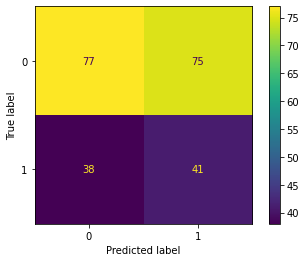

In [53]:
plot_confusion_matrix(modelo_sgdc, X_test, y_test);

In [54]:
print('Resultado do Modelo SGDClassifier \n' + classification_report(y_test, 
                                                                     y_previsao_sgdc, 
                                                                     target_names=target_names))

Resultado do Modelo SGDClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.67      0.51      0.58       152
 Com Diabete       0.35      0.52      0.42        79

    accuracy                           0.51       231
   macro avg       0.51      0.51      0.50       231
weighted avg       0.56      0.51      0.52       231



<div class="alert alert-danger" style="margin-top: 20px">
<h1> Modelo KNeighborsClassifier </h1>

In [55]:
modelo_knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
y_previsao_knn = modelo_knn.predict(X_test)
y_previsao_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### Avaliação do Modelo KNeighborsClassifier

In [56]:
# Avaliando a acurácia do modelo
# accuracy_score(y_test,y_pred)
print(f"Accuracy KNeighborsClassifier on train set: {modelo_sgdc.score(X_train, y_train):.2%}") 
print(f'Accuracy KNeighborsClassifier on test set: {modelo_sgdc.score(X_test, y_test):.2%}')
print(f'Recall SKNeighborsClassifier on test set: {recall_score(y_test, y_previsao_sgdc):.2%}')
# print(f'ROC/AUC SGDClassifier on test set: {roc_auc_score(y_test, modelo_sgdc.predict_proba(X_test)[:,1]):.2%}')

Accuracy KNeighborsClassifier on train set: 54.38%
Accuracy KNeighborsClassifier on test set: 51.08%
Recall SKNeighborsClassifier on test set: 51.90%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


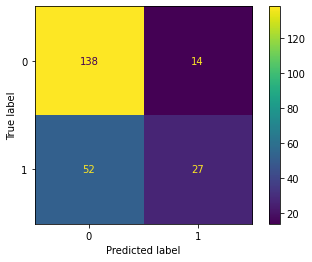

In [57]:
plot_confusion_matrix(modelo_knn, X_test, y_test);

In [58]:
print('Resultado do Modelo SGDClassifier \n' + classification_report(y_test, 
                                                                     y_previsao_knn, 
                                                                     target_names=target_names))

Resultado do Modelo SGDClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.73      0.91      0.81       152
 Com Diabete       0.66      0.34      0.45        79

    accuracy                           0.71       231
   macro avg       0.69      0.62      0.63       231
weighted avg       0.70      0.71      0.68       231



Fonte: [sklearn.org - KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#examples-using-sklearn-neighbors-kneighborsclassifier)

<div class="alert alert-danger" style="margin-top: 20px">
<h1> Modelo ExtraTreeClassifier </h1>

In [59]:
modelo_et = ExtraTreesClassifier(max_depth=None, 
                                 min_samples_split=7,
                                 random_state=0).fit(X_train, y_train)
y_previsao_et = modelo_et.predict(X_test)
y_previsao_et

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

### Avaliação do Modelo KNeighborsClassifier

In [60]:
# Avaliando a acurácia do modelo
# accuracy_score(y_test,y_pred)
print(f"Accuracy KNeighborsClassifier on train set: {modelo_et.score(X_train, y_train):.2%}") 
print(f'Accuracy KNeighborsClassifier on test set: {modelo_et.score(X_test, y_test):.2%}')
print(f'Recall SKNeighborsClassifier on test set: {recall_score(y_test, y_previsao_et):.2%}')
print(f'ROC/AUC SGDClassifier on test set: {roc_auc_score(y_test, modelo_sgdc.predict_proba(X_test)[:,1]):.2%}')

Accuracy KNeighborsClassifier on train set: 97.95%
Accuracy KNeighborsClassifier on test set: 79.22%
Recall SKNeighborsClassifier on test set: 64.56%
ROC/AUC SGDClassifier on test set: 49.73%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


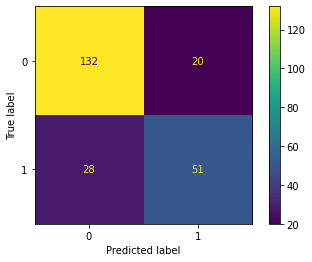

In [61]:
plot_confusion_matrix(modelo_et, X_test, y_test);

In [62]:
print('Resultado do Modelo SGDClassifier \n' + classification_report(y_test, 
                                                                     y_previsao_knn, 
                                                                     target_names=target_names))

Resultado do Modelo SGDClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.73      0.91      0.81       152
 Com Diabete       0.66      0.34      0.45        79

    accuracy                           0.71       231
   macro avg       0.69      0.62      0.63       231
weighted avg       0.70      0.71      0.68       231



Fonte: [Sklearn.org - ExtraTreeClassifier](https://scikit-learn.org/stable/modules/ensemble.html#forest)

<div class="alert alert-warning " style="margin-top: 20px">
<h1> Salvando o Modelo Para Deploy </h1>

Deploy do Modelo

 - Passo 1 -> Criar arquivo do modelo (joblib)
 - Passo 2 -> Escolher a Forma de Deploy:
        - Arquivo executável + Tkinter
        - Deploy em um Microsite (Flask)
        - Deploy para uso direto (Streamlit)
 - Passo 3 -> Outro Arquivo Python (pode ser Jupyter ou PyCharm)
 - Passo 4 -> Impostar Steamlit e criar código
 - Passo 5 -> Atribuir ao botão o carregamento do modelo
 - Passo 6 -> Deploy feito

In [63]:
# Forma 1:
# Salvando o modelo em formato joblib
import joblib
joblib.dump(modelo_svm, 'modelo_svm_desbalanceado.joblib')

['modelo_svm_desbalanceado.joblib']

In [64]:
# Forma 2:
# Salvando o modelo no formato sav, com a biblioteca pickle
import pickle
filename = 'modelo_gbc_desbalanceado.sav'
pickle.dump(modelo_svm, open(filename, 'wb'))

 <div class="alert alert-success d-flex align-items-center" role="alert">
  <svg class="bi flex-shrink-0 me-2" width="24" height="24" role="img" aria-label="Success:"><use xlink:href="#check-circle-fill"/></svg>
  <div><h1>
    Modelando Agora para Dados Balanceados e com Pipeline
  </div></h1>


In [65]:
# Etapas do projeto, comecando da separação em treino e teste
# - Padronizar as variáveis  
# - balancear os dados
# - rodar os modelos em uma função

In [66]:
scaler = StandardScaler().fit(X_train)

In [67]:
X_train_scala = scaler.transform(X_train)
X_test_scala = scaler.transform(X_test)

In [68]:
X_train_scala

array([[ 5.95325222e-02, -8.34392900e-01,  8.94949636e-02, ...,
         3.60198432e-02,  3.97562393e-01, -7.73077408e-01],
       [-1.13556895e+00, -5.29908004e-02, -3.40387542e+00, ...,
         7.20173416e-02, -1.00991299e+00, -7.73077408e-01],
       [-5.38018215e-01, -6.71600796e-01,  8.94949636e-02, ...,
         1.04394980e+00,  5.91799972e-01, -6.87144357e-01],
       ...,
       [ 6.57083259e-01, -4.43691850e-01,  9.87790205e-01, ...,
         5.99980651e-01,  7.41213494e-01, -1.71546053e-01],
       [-5.38018215e-01, -1.48556132e+00, -2.09936784e-01, ...,
        -2.51960144e-01, -3.25599054e-01,  3.20048606e-04],
       [-5.38018215e-01, -4.43691850e-01,  2.89116128e-01, ...,
         2.16007335e-01, -2.23997859e-01, -8.59010459e-01]])

In [69]:
X_test_scala

array([[-0.83679358, -0.6716008 , -0.1101262 , ...,  0.02402068,
        -0.10446704,  0.77371751],
       [ 1.55340936, -2.07161289,  0.58854788, ...,  0.12001401,
        -1.14438515,  0.68778445],
       [-1.13556895, -0.6716008 ,  0.08949496, ..., -0.11996932,
         0.35273834, -1.03087656],
       ...,
       [-0.23924285,  0.30515183,  0.48873729, ..., -0.4079493 ,
        -0.46604776,  0.0862531 ],
       [-1.13556895, -0.8343929 , -0.20993678, ...,  1.53591561,
        -0.33755214, -0.94494351],
       [-0.23924285, -0.15066606, -3.40387542, ..., -0.99590844,
        -0.87245254, -0.85901046]])

In [70]:
# Importando o RandomUnderSampler do imblearn
from imblearn.under_sampling import RandomUnderSampler

In [71]:
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [72]:
# Aplicando para X e y
X_res, y_res = rus.fit_resample(X_train_scala, y_train)

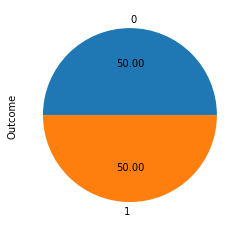

In [73]:
# Visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f');

In [74]:
y_res.shape


(378,)

In [75]:
X_res.shape

(378, 8)

In [76]:
# Criando uma função para rodar todos os modelos e os parametros de melhorias caso
# sejam necessário. Caso não determine os parametros o modelo rodará default.
modelo_lr = LogisticRegression(random_state=0, max_iter=500)
modelo_rfc = RandomForestClassifier(n_estimators=10, 
                                    max_depth=None,
                                    min_samples_split=2, 
                                    random_state=0)
modelo_dt = tree.DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
modelo_svm = svm.SVC(kernel='rbf')
modelo_sgdc = SGDClassifier(alpha=0.1, # taxa de regularização
                              learning_rate='constant', 
                              eta0=0.005, # taxa de aprendizagem
                              loss='log', 
                              max_iter=1000,
                              random_state=4, 
                              verbose=True,
                              early_stopping=True, 
                              validation_fraction=0.15)
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_et = ExtraTreesClassifier()
modelo_gbc = GradientBoostingClassifier(n_estimators=1200,
                                     learning_rate=.01,
                                     max_depth=1, 
                                     random_state=0)

# Gerando um dicionário para rodar varios modelos na sequência
modelos = {
    'LogisticRegression': modelo_lr,
    'RandomForestClassifier': modelo_rfc,
    'tree.DecisionTreeClassifier':modelo_dt,
    'svm.SVC': modelo_svm,
    'SGDClassifier': modelo_sgdc,
    'KNeighborsClassifier': modelo_knn,
    'ExtraTreeClassifier': modelo_et,
    'GradientBoostingClassifier': modelo_gbc
}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


-- Epoch 1
Norm: 0.43, NNZs: 8, Bias: -0.262831, T: 456, Avg. loss: 0.521646
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.58, NNZs: 8, Bias: -0.419910, T: 912, Avg. loss: 0.464483
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.68, NNZs: 8, Bias: -0.523157, T: 1368, Avg. loss: 0.448227
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.72, NNZs: 8, Bias: -0.587434, T: 1824, Avg. loss: 0.439889
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.75, NNZs: 8, Bias: -0.626714, T: 2280, Avg. loss: 0.436392
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.78, NNZs: 8, Bias: -0.647780, T: 2736, Avg. loss: 0.435565
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.77, NNZs: 8, Bias: -0.677047, T: 3192, Avg. loss: 0.432166
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.78, NNZs: 8, Bias: -0.691878, T: 3648, Avg. loss: 0.433031
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.78, NNZs: 8, Bias: -0.707682, T: 4104, Avg. loss: 0.431907
Total training time:

In [77]:
# Criando uma função para executar em sequência os modelos, juntamente com 
def avaliar_modelo(nome_modelo, y_test, previsao):
    target_names = ['Sem Diabete', 'Com Diabete']
    return print(f'Resultado do Modelo {nome_modelo} \n' + classification_report(y_test, 
                                                                                 previsao, 
                                                                                 target_names=target_names))

In [78]:
# Parte de código destinada para testar os modelos imprimindo os resultados
# O nome do modelo é como ele aparece na biblioteca, e o modelo é como 
# ele é executado também na boblioteca para que não dê erro no momento
# da execução dos modelos.
# PARA O MODELO SER VIÁVEL A MEDIDA DE ACERTIVIDADE DELE DEVE SER SUPERIOR A 75%
# 
for nome_modelo, modelo in modelos.items():
    # Treinar 
    modelo.fit(X_train_scala, y_train)
    # Testar
    previsao = modelo.predict(X_test_scala)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Resultado do Modelo LogisticRegression 
              precision    recall  f1-score   support

 Sem Diabete       0.83      0.89      0.86       152
 Com Diabete       0.76      0.66      0.71        79

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231

None
Resultado do Modelo RandomForestClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.79      0.85      0.82       152
 Com Diabete       0.66      0.56      0.60        79

    accuracy                           0.75       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231

None
Resultado do Modelo tree.DecisionTreeClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.83      0.88      0.85       152
 Com Diabete       0.73      0.65      0.68        79

    accuracy                           

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Resultado do Modelo ExtraTreeClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.81      0.87      0.84       152
 Com Diabete       0.71      0.61      0.65        79

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.78      0.77       231

None
Resultado do Modelo GradientBoostingClassifier 
              precision    recall  f1-score   support

 Sem Diabete       0.84      0.88      0.86       152
 Com Diabete       0.74      0.67      0.70        79

    accuracy                           0.81       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231

None


## Fim